In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy.io import wavfile
from scipy.fftpack import fft
from scipy.signal import get_window
from scipy.interpolate import interp1d
import tkinter as tk
from tkinter import filedialog as fd
import pandas as pd
import fft_volume as fv


In [63]:
#test 1 
Ampl_list = []

for i in range (1,5):
        INPUT_FILE = f"C:/Users/aleja/OneDrive/Desktop/mice maze/recordings_calibration/latest_{i}.wav"
        freq_list_test1 = [15000, 16000, 17000, 18000, 19000, 20000]

        #every row stands for the volumes dbSPL per frequencies (aka row 0 is all the trials for freq 15kHz)
        spls_for_all_test1= np.array([[68, 66, 67, 67.8],
                        [65.4, 64.8, 66, 66],
                        [63.3, 63.8, 63.8, 63.5],
                        [58.3, 59.4, 60.2, 60],
                        [55, 57.1, 56.8, 56],
                        [55, 54.7, 55, 54.8]])


        times = np.array([[[41,52], [57, 68], [74, 84], [92,100], [106, 115], [123, 135]],
                [[27,40], [54,57], [62,74], [76,90], [97,107], [112,123]],
                [[60,73], [77,91], [93,106], [110,123], [126, 140], [144,150]], 
                [[40,52], [55,69], [72,85], [88,101], [107,119], [124,135]]])


        start_time, end_time, spls = fv.get_start_end_times(INPUT_FILE, freq_list_test1, spls_for_all_test1, times)
        calibration_constants_lists , Amps_test1= fv.find_c_for_all (INPUT_FILE, freq_list_test1, start_time, end_time, spls)
        Ampl_list.append(Amps_test1)

        

In [64]:
print(freq_list_test1)
print(len(Ampl_list))

[15000, 16000, 17000, 18000, 19000, 20000]
4


In [70]:
cols = {"frequency": freq_list_test1}
for i in range(len(Ampl_list)):
    cols[f"amplitude FFT {i+1}"] = Ampl_list[i]
    cols[f"measured_volume (dB) {i+1}"] = spls_for_all_test1[:, i]
    cols[f'raw volume dB {i+1}'] = Lraws_test1[i]
    cols[f'adjusted volume dB {i+1}']= Ladjs_test1[i]
    cols[f'attenuation {i+1}']= attenuation_values_test1[i]

df_test1 = pd.DataFrame(cols)
df_test1

,frequency,amplitude FFT 1,measured_volume (dB) 1,raw volume dB 1,adjusted volume dB 1,attenuation 1,amplitude FFT 2,measured_volume (dB) 2,raw volume dB 2,adjusted volume dB 2,...,amplitude FFT 3,measured_volume (dB) 3,raw volume dB 3,adjusted volume dB 3,attenuation 3,amplitude FFT 4,measured_volume (dB) 4,raw volume dB 4,adjusted volume dB 4,attenuation 4
0,15000,40866.399651,68.0,67.977328,61.259528,-6.717800,40327.052363,66.0,67.861930,61.144130,...,41043.581877,67.0,68.014905,61.297105,-6.717800,41089.538497,67.8,68.024625,61.306825,-6.717800
1,16000,38169.324803,65.4,67.384290,60.523527,-6.860763,38112.887796,64.8,67.371437,60.510675,...,38155.107027,66.0,67.381054,60.520291,-6.860763,36818.675550,66.0,67.071363,60.210601,-6.860763
2,17000,38106.545896,63.3,67.369992,61.585521,-5.784471,38072.657031,63.8,67.362264,61.577793,...,37903.089630,63.8,67.323492,61.539021,-5.784471,37585.827147,63.5,67.250482,61.466011,-5.784471
3,18000,40766.768444,58.3,67.956126,63.247947,-4.708179,38169.269546,59.4,67.384277,62.676098,...,40758.089374,60.2,67.954276,63.246097,-4.708179,38596.528707,60.0,67.480965,62.772786,-4.708179
4,19000,35137.617541,55.0,66.665446,63.033559,-3.631887,34317.564000,57.1,66.460329,62.828442,...,29917.156722,56.8,65.268406,61.636519,-3.631887,32977.571969,56.0,66.114374,62.482486,-3.631887
5,20000,32234.770630,55.0,65.916492,63.282488,-2.634004,32570.077697,54.7,66.006376,63.372372,...,29349.520237,55.0,65.102020,62.468016,-2.634004,33917.599978,54.8,66.358502,63.724498,-2.634004


In [57]:
Lraws_test1 = []
Ladjs_test1 = []
Amps_test1  = []
attenuation_values_test1  = []

for i in Ampl_list:
    # print(f"frequency array: {freq_list_test1}")
    # print(f"amplitude list: {i}")
    Lraw_test1, Ladj_test1, Amp_test1, attenuation_value_test1 = get_volumes(freq_list_test1, i)
    #print(f"raw volume:\n{Lraw_test1},\nadjusted volume:\n {Ladj_test1},\namplitude:\n {Amp_test1},\nattenuation value:\n {attenuation_value_test1}")
    Lraws_test1.append(Lraw_test1)
    Ladjs_test1.append(Ladj_test1)
    Amps_test1.append(Amp_test1)
    attenuation_values_test1.append(attenuation_value_test1)

print(Lraws_test1)
print(Ladjs_test1)
print(Amps_test1)
print(attenuation_values_test1)

[[67.9773275569471, 67.38428955120337, 67.36999169319608, 67.95612573144031, 66.66544622807476, 65.91649168569423], [67.86192958319091, 67.3714371262435, 67.36226373209487, 67.38427697680098, 66.46032904560367, 66.00637589184613], [68.01490509351353, 67.38105352210891, 67.32349224932396, 67.95427634590857, 65.2684063301892, 65.10202012852486], [68.02462526896956, 67.07136323802014, 67.25048224302586, 67.4809649374461, 66.1143735361155, 66.35850227667208]]
[[61.25952771516048, 60.52352695491516, 61.58552094228584, 63.247946825908016, 63.03355916792042, 63.2824878262255], [61.14412974140429, 60.5106745299553, 61.57779298118463, 62.67609807126868, 62.82844198544934, 63.372372032377406], [61.29710525172691, 60.52029092582071, 61.53902149841372, 63.246097440376275, 61.63651927003486, 62.46801626905613], [61.306825427182936, 60.210600641731936, 61.46601149211561, 62.77278603191381, 62.48248647596116, 63.72449841720336]]
[[40866.39965083342, 38169.324803320924, 38106.54589593064, 40766.768444

In [35]:
Lraws_test1 = [[67.9773275569471, 67.38428955120337, 67.36999169319608, 67.95612573144031, 66.66544622807476, 65.91649168569423], [67.86192958319091, 67.3714371262435, 67.36226373209487, 67.38427697680098, 66.46032904560367, 66.00637589184613], [68.01490509351353, 67.38105352210891, 67.32349224932396, 67.95427634590857, 65.2684063301892, 65.10202012852486], [68.02462526896956, 67.07136323802014, 67.25048224302586, 67.4809649374461, 66.1143735361155, 66.35850227667208]]
Ladjs_test1 = [[61.25952771516048, 60.52352695491516, 61.58552094228584, 63.247946825908016, 63.03355916792042, 63.2824878262255], [61.14412974140429, 60.5106745299553, 61.57779298118463, 62.67609807126868, 62.82844198544934, 63.372372032377406], [61.29710525172691, 60.52029092582071, 61.53902149841372, 63.246097440376275, 61.63651927003486, 62.46801626905613], [61.306825427182936, 60.210600641731936, 61.46601149211561, 62.77278603191381, 62.48248647596116, 63.72449841720336]]
Amps_test1 = [[40866.39965083342, 38169.324803320924, 38106.54589593064, 40766.76844445841, 35137.617541056396, 32234.770629702605], [40327.05236347143, 38112.887795992145, 38072.65703119488, 38169.2695463327, 34317.56399958136, 32570.077697173623], [41043.581877036195, 38155.10702659034, 37903.089630249604, 40758.08937425143, 29917.156721878917, 29349.520236670924], [41089.53849695277, 36818.675549543004, 37585.82714656826, 38596.528707294136, 32977.57196942212, 33917.599978071754]]
attenuation_values_test1 = [[-6.71779984178662, -6.860762596288201, -5.784470750910245, -4.708178905532289, -3.631887060154333, -2.6340038594687294], [-6.71779984178662, -6.860762596288201, -5.784470750910245, -4.708178905532289, -3.631887060154333, -2.6340038594687294], [-6.71779984178662, -6.860762596288201, -5.784470750910245, -4.708178905532289, -3.631887060154333, -2.6340038594687294], [-6.71779984178662, -6.860762596288201, -5.784470750910245, -4.708178905532289, -3.631887060154333, -2.6340038594687294]]

    

frequency array: [15000, 16000, 17000, 18000, 19000, 20000]
amplitude list: [40866.39965083342, 38169.324803320924, 38106.54589593064, 40766.76844445841, 35137.617541056396, 32234.770629702605]
raw volume:
[67.26641530954507, 67.91743481832438, 67.32905288702051, 67.31700868415922, 67.95443242209006, 67.95634832310827],
adjusted volume:
 [66.57894399609015, 67.79990754561634, 67.32905288702051, 66.3131395701124, 65.51372959418869, 61.23854848132165],
amplitude:
 [37654.83643701666, 40585.57851949221, 37927.362656658035, 37874.80750074098, 40758.82176026754, 40767.81318018935],
attenuation value:
 [-0.6874713134549264, -0.11752727270804386, 0.0, -1.0038691140468192, -2.4407028279013794, -6.71779984178662]
frequency array: [15000, 16000, 17000, 18000, 19000, 20000]
amplitude list: [40327.05236347143, 38112.887795992145, 38072.65703119488, 38169.2695463327, 34317.56399958136, 32570.077697173623]
raw volume:
[67.26641530954507, 67.91743481832438, 67.32905288702051, 67.31700868415922, 67.95

[15000, 16000, 17000, 18000, 19000, 20000]
[[67.26641530954507, 67.91743481832438, 67.32905288702051, 67.31700868415922, 67.95443242209006, 67.95634832310827], [67.26641530954507, 67.91743481832438, 67.32905288702051, 67.31700868415922, 67.95443242209006, 67.95634832310827], [67.26641530954507, 67.91743481832438, 67.32905288702051, 67.31700868415922, 67.95443242209006, 67.95634832310827], [67.26641530954507, 67.91743481832438, 67.32905288702051, 67.31700868415922, 67.95443242209006, 67.95634832310827]]
[[66.57894399609015, 67.79990754561634, 67.32905288702051, 66.3131395701124, 65.51372959418869, 61.23854848132165], [66.57894399609015, 67.79990754561634, 67.32905288702051, 66.3131395701124, 65.51372959418869, 61.23854848132165], [66.57894399609015, 67.79990754561634, 67.32905288702051, 66.3131395701124, 65.51372959418869, 61.23854848132165], [66.57894399609015, 67.79990754561634, 67.32905288702051, 66.3131395701124, 65.51372959418869, 61.23854848132165]]
[[37654.83643701666, 40585.5785

In [ ]:
#test 2
freq_list = []
start_time_list = []
end_time_list = []
input_list = []
for i in range (1,7):

    INPUT_FILE = f"C:/Users/aleja/OneDrive/Desktop/mice maze/recordings_calibration/pre_Malawi_{i}.wav"

    #get times of events, and visually check that everything is okay 
    start_times, end_times, freqs = fv.find_time_range(INPUT_FILE, show_plot = False)
    start_time_list.append(start_times)
    end_time_list.append(end_times)
    freq_list.append(freqs)
    input_list.append(INPUT_FILE)
    
    variables_sorted= sorted(zip(freq_list, input_list, start_time_list, end_time_list))
    

    files_sorted = []
    freq_sorted = []
    start_time_sorted = []
    end_time_sorted = []

    for i in range(len(freq_list)):
        
        freq_sorted.append(variables_sorted[i][0])
        files_sorted.append(variables_sorted[i][1])
        start_time_sorted.append(variables_sorted[i][2])
        end_time_sorted.append(variables_sorted[i][3])

    spls_for_all= np.array([67.98, 68.95, 67.32, 71.38, 67.77, 66.31, 65.66])

#sorted frequencies        
freq, input_list, start_time, end_time = freq_sorted, files_sorted, start_time_sorted, end_time_sorted 


print("all done!")


c:\Users\aleja\OneDrive\Documents\GitHub\mice-maze\code\auditory\fft_volume.py:20: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sample_rate, data = wavfile.read(INPUT_FILE)


In [4]:
print(freq)
print(input_list)
print(start_time)
print(end_time)

[7992.1900000000005, 9000.0, 10007.81, 10992.19, 12000.0, 15000.0]
['C:/Users/aleja/OneDrive/Desktop/mice maze/recordings_calibration/pre_Malawi_1.wav', 'C:/Users/aleja/OneDrive/Desktop/mice maze/recordings_calibration/pre_Malawi_6.wav', 'C:/Users/aleja/OneDrive/Desktop/mice maze/recordings_calibration/pre_Malawi_5.wav', 'C:/Users/aleja/OneDrive/Desktop/mice maze/recordings_calibration/pre_Malawi_4.wav', 'C:/Users/aleja/OneDrive/Desktop/mice maze/recordings_calibration/pre_Malawi_3.wav', 'C:/Users/aleja/OneDrive/Desktop/mice maze/recordings_calibration/pre_Malawi_2.wav']
[[55.9, 67.39, 78.95, 90.51, 102.02, 113.53, 125.1, 136.64], [64.11, 75.61, 87.18, 98.77, 110.32, 121.84, 133.41, 144.95], [33.45, 44.96, 56.53, 68.11, 79.67, 91.23, 102.77, 114.28, 125.84, 137.43], [41.71, 53.25, 64.75, 76.34, 87.85, 99.41, 110.98, 122.54, 134.11, 145.67], [25.85, 37.37, 48.94, 60.5, 72.08, 83.65, 95.21, 106.79, 118.36, 129.95], [30.37, 41.93, 53.52, 65.09, 76.65, 88.22, 99.79, 111.37, 122.89, 134.46]

In [3]:
freq = [7992.1900000000005, 9000.0, 10007.81, 10992.19, 12000.0, 15000.0]
input_list = ['C:/Users/aleja/OneDrive/Desktop/mice maze/recordings_calibration/pre_Malawi_1.wav', 'C:/Users/aleja/OneDrive/Desktop/mice maze/recordings_calibration/pre_Malawi_6.wav', 'C:/Users/aleja/OneDrive/Desktop/mice maze/recordings_calibration/pre_Malawi_5.wav', 'C:/Users/aleja/OneDrive/Desktop/mice maze/recordings_calibration/pre_Malawi_4.wav', 'C:/Users/aleja/OneDrive/Desktop/mice maze/recordings_calibration/pre_Malawi_3.wav', 'C:/Users/aleja/OneDrive/Desktop/mice maze/recordings_calibration/pre_Malawi_2.wav']
start_time = [[55.9, 67.39, 78.95, 90.51, 102.02, 113.53, 125.1, 136.64], [64.11, 75.61, 87.18, 98.77, 110.32, 121.84, 133.41, 144.95], [33.45, 44.96, 56.53, 68.11, 79.67, 91.23, 102.77, 114.28, 125.84, 137.43], [41.71, 53.25, 64.75, 76.34, 87.85, 99.41, 110.98, 122.54, 134.11, 145.67], [25.85, 37.37, 48.94, 60.5, 72.08, 83.65, 95.21, 106.79, 118.36, 129.95], [30.37, 41.93, 53.52, 65.09, 76.65, 88.22, 99.79, 111.37, 122.89, 134.46]]
end_time = [[65.75, 77.26, 88.81, 100.37, 111.88, 123.39, 134.96, 146.5], [73.96, 85.47, 97.04, 108.63, 120.19, 131.71, 143.27, 152.0], [43.3, 54.82, 66.39, 77.97, 89.53, 101.1, 112.62, 124.14, 135.71, 147.29], [51.57, 63.11, 74.6, 86.2, 97.71, 109.27, 120.84, 132.41, 143.97, 152.0], [35.7, 47.23, 58.8, 70.37, 81.94, 93.51, 105.07, 116.65, 128.23, 139.81], [40.23, 51.8, 63.38, 74.95, 86.51, 98.09, 109.66, 121.24, 132.76, 144.33]]

In [5]:

# Creating the DataFrame
data = {
    'Frequency': freq,
    'Input': input_list,
    'Start Time': start_time,
    'End Time': end_time
}

df = pd.DataFrame(data)

df


,Frequency,Input,Start Time,End Time
0,7992.19,C:/Users/aleja/OneDrive/Desktop/mice maze/reco...,"[55.9, 67.39, 78.95, 90.51, 102.02, 113.53, 12...","[65.75, 77.26, 88.81, 100.37, 111.88, 123.39, ..."
1,9000.00,C:/Users/aleja/OneDrive/Desktop/mice maze/reco...,"[64.11, 75.61, 87.18, 98.77, 110.32, 121.84, 1...","[73.96, 85.47, 97.04, 108.63, 120.19, 131.71, ..."
2,10007.81,C:/Users/aleja/OneDrive/Desktop/mice maze/reco...,"[33.45, 44.96, 56.53, 68.11, 79.67, 91.23, 102...","[43.3, 54.82, 66.39, 77.97, 89.53, 101.1, 112...."
3,10992.19,C:/Users/aleja/OneDrive/Desktop/mice maze/reco...,"[41.71, 53.25, 64.75, 76.34, 87.85, 99.41, 110...","[51.57, 63.11, 74.6, 86.2, 97.71, 109.27, 120...."
4,12000.00,C:/Users/aleja/OneDrive/Desktop/mice maze/reco...,"[25.85, 37.37, 48.94, 60.5, 72.08, 83.65, 95.2...","[35.7, 47.23, 58.8, 70.37, 81.94, 93.51, 105.0..."
5,15000.00,C:/Users/aleja/OneDrive/Desktop/mice maze/reco...,"[30.37, 41.93, 53.52, 65.09, 76.65, 88.22, 99....","[40.23, 51.8, 63.38, 74.95, 86.51, 98.09, 109...."


In [36]:
spls_for_all= np.array([67.98, 68.95, 67.32, 71.38, 67.77, 66.31])
freq, amp, amp_raw, c_per_freq, c_per_freq_raw = find_c_2(freq, input_list, spls_for_all, start_time, end_time)
print("all done")

TypeError: object of type 'float' has no len()

In [44]:
#results from the previous piece of code in case I need to restart the kernel 
freq = [7992.1900000000005, 9000.0, 10007.81, 10992.19, 12000.0, 15000.0]
amp = [37654.83643701666, 40585.57851949221, 37927.362656658035, 37874.80750074098, 40758.82176026754, 40767.81318018935]
amp_raw = [154234210.04602024, 166238529.61584008, 155350477.4416713, 155135211.52303505, 166948133.93005586, 166984962.78605556]
c_per_freq = [-23.53641251624273, -23.217431324991146, -24.25905141400377, -20.187006698229485, -24.434429316848185, -25.896340961385885]
c_per_freq_raw = [-95.78361147559822, -95.46463028434664, -96.50625037335928, -92.43420565758497, -96.68162827620367, -98.14353992074139]

In [8]:
dayta = {"frequency": freq,
        "amplitude": amp, 
        "raw amplitude": amp_raw,
        "volume (dB)" : spls_for_all,
        "constant (C)": c_per_freq,
        "constant from raw amplitude": c_per_freq_raw        
        }

amp_c_df = pd.DataFrame(dayta)

amp_c_df

,frequency,amplitude,raw amplitude,volume (dB),constant (C),constant from raw amplitude
0,7992.19,37654.836437,1.542342e+08,67.98,-23.536413,-95.783611
1,9000.00,40585.578519,1.662385e+08,68.95,-23.217431,-95.464630
2,10007.81,37927.362657,1.553505e+08,67.32,-24.259051,-96.506250
3,10992.19,37874.807501,1.551352e+08,71.38,-20.187007,-92.434206
4,12000.00,40758.821760,1.669481e+08,67.77,-24.434429,-96.681628
5,15000.00,40767.813180,1.669850e+08,66.31,-25.896341,-98.143540


## calculate the volume in SPL based on the calibration constant and the formula Lraw(f) = 20*np.log10(A(f)) + C

In [45]:

#Lraw(f) = 20*np.log10(A(f)) + C
calibration_constant = -24.25
Lraws = []
Amps = []
for i in range(len(freq)):
    Lraw = 20*np.log10(amp[i]) + calibration_constant
    print(freq[i], amp[i], Lraw)
    Lraws.append(Lraw)
    Amps.append(amp[i])

# print(freq)
# print(Lraws)
# print(Amps)

7992.1900000000005 37654.83643701666 67.26641530954507
9000.0 40585.57851949221 67.91743481832438
10007.81 37927.362656658035 67.32905288702051
10992.19 37874.80750074098 67.31700868415922
12000.0 40758.82176026754 67.95443242209006
15000.0 40767.81318018935 67.95634832310827


### get the delta S frequency response of the speaker (attenuation in dB) retrieved from the graph on the website, using the https://automeris.io/wpd/ data extraction tool

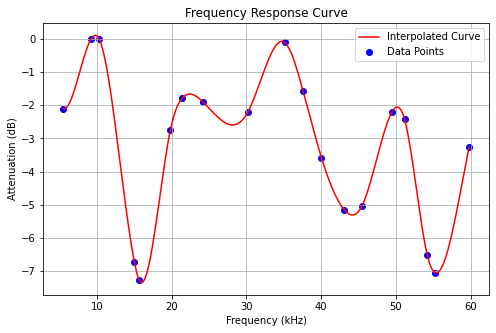

In [ ]:

# Step 1: Load the CSV data
data = pd.read_csv("C:/Users/aleja/Downloads/frequency_response_speaker.csv")

# Assuming your CSV has headers "Frequency_kHz" and "Attenuation_dB"
frequency = data['Frequency_kHz'].values
attenuation = data['Attenuation_dB'].values

# Step 2: Create an interpolation function
# Use linear interpolation; you can change 'kind' to 'cubic' for smoother curves if desired.
interp_func = interp1d(frequency, attenuation, kind='cubic', fill_value="extrapolate")

# Step 3: Plot the original points and the interpolated curve
plt.figure(figsize=(8, 5))

# Plot original data points
plt.scatter(frequency, attenuation, color='blue', label='Data Points')

# Generate a smooth frequency axis for plotting the interpolated curve
frequency_smooth = np.linspace(min(frequency), max(frequency), 500)
attenuation_smooth = interp_func(frequency_smooth)

# Plot the interpolated curve
plt.plot(frequency_smooth, attenuation_smooth, color='red', label='Interpolated Curve')

plt.xlabel('Frequency (kHz)')
plt.ylabel('Attenuation (dB)')
plt.title('Frequency Response Curve')
plt.legend()
plt.grid(True)
plt.show()




In [77]:
# Step 4: Retrieve an interpolated value for any given frequency
# at around 10kHz the attenuation is 0, so yay we chose the C wisely
frequency_query = 17
attenuation_value = interp_func(frequency_query)
print(f"At {frequency_query} kHz, the estimated attenuation is {attenuation_value:.2f} dB.")

At 17 kHz, the estimated attenuation is -6.76 dB.


In [46]:
#get delta S for the frequencies 

def get_delta_s(freq):
    #the frequency needs to be in kHz, not Hz
    i = freq/1000
    attenuation_value = interp_func(i)
    attenuation_value = attenuation_value.item()

    return attenuation_value




In [50]:
#calculate volume in dBspl adjusting for the frequency response of the speaker (can't also include that for the mic yet because it's too much for now, so an approximation would be enough e fammocc)

calibration_constant = -24.25

def get_volumes(freq_list, amp_list, calibration_constant= -24.25):
    Lraws = []
    Ladjs = []
    Amps = []
    attenuation_values = []
    for i in range(len(freq_list)):
        Lraw = 20*np.log10(amp_list[i]) + calibration_constant
        attenuation_value = get_delta_s(freq_list[i])
        Ladj = 20*np.log10(amp_list[i]) + calibration_constant + attenuation_value

        #print(freq[i], amp[i], Lraw, Ladj, attenuation_value)
        Lraws.append(Lraw)
        Ladjs.append(Ladj)
        Amps.append(amp_list[i])
        attenuation_values.append(attenuation_value)

    return Lraws, Ladjs, Amps, attenuation_values

Lraws, Ladjs, Amps, attenuation_values = get_volumes(freq, amp)


In [51]:
#values measured with the digital sound level meter
spls_for_all= np.array([67.98, 68.95, 67.32, 71.38, 67.77, 66.31])

#I need to see this in a df

adj_volumes = {"Frequency": freq, 
               'FFT_amplitude':Amps,
               'dbSPL_raw': Lraws,
               'dbSPL_adjusted': Ladjs,
               'dBSPL_from_DSLM': spls_for_all,
               "attenuation_values": attenuation_values,
               'calibration constant' : calibration_constant          

}

table = pd.DataFrame(adj_volumes)

table

,Frequency,FFT_amplitude,dbSPL_raw,dbSPL_adjusted,dBSPL_from_DSLM,attenuation_values,calibration constant
0,7992.19,37654.836437,67.266415,66.578944,67.98,-0.687471,-24.25
1,9000.00,40585.578519,67.917435,67.799908,68.95,-0.117527,-24.25
2,10007.81,37927.362657,67.329053,67.329053,67.32,0.000000,-24.25
3,10992.19,37874.807501,67.317009,66.313140,71.38,-1.003869,-24.25
4,12000.00,40758.821760,67.954432,65.513730,67.77,-2.440703,-24.25
5,15000.00,40767.813180,67.956348,61.238548,66.31,-6.717800,-24.25


In [38]:
# finds calibration constant

def find_c_2(freq, input_list, spls_for_all, start_time, end_time):
    c_per_freq = []
    c_per_freq_raw = []
    amp_avgd = []
    amp_raw_avgd = []
    for i in range(len(input_list)):
    
        if len(start_time[i])== len(end_time[i]):
            # print (i-1, freq[i-1], start_time[i-1], end_time[i], len(start_time[i-1]), len(end_time[i-1]))
            c_per_time = []
            c_per_time_raw =[]
            amp_per_time = []
            amp_raw_per_time = []
            for j in range(len(start_time[i])):
                amp, amp_raw = fv.find_amplitude(input_list[i], start_time[i][j], end_time[i][j], 8192, freq[i])
                cc= fv.find_calibration_constant(spls_for_all[i], amp)
                cc1= fv.find_calibration_constant(spls_for_all[i], amp_raw)
                

                print(freq[i],cc, cc1, spls_for_all[i], amp, amp_raw)
        
                c_per_time.append(cc)
                c_per_time_raw.append(cc1)
                amp_per_time.append(amp)
                amp_raw_per_time.append(amp_raw)

            avg_c = sum(c_per_time)/ len(c_per_time)
            avg_c_raw = sum(c_per_time_raw)/ len(c_per_time_raw)
            avg_amp = sum(amp_per_time) / len(amp_per_time)
            avg_raw_amp = sum(amp_raw_per_time) / len(amp_raw_per_time)




            amp_avgd.append(avg_amp)
            amp_raw_avgd.append(avg_raw_amp)
            c_per_freq.append(avg_c)
            c_per_freq_raw.append(avg_c_raw)

   
    
    return freq, amp_avgd, amp_raw_avgd, c_per_freq, c_per_freq_raw

all done!


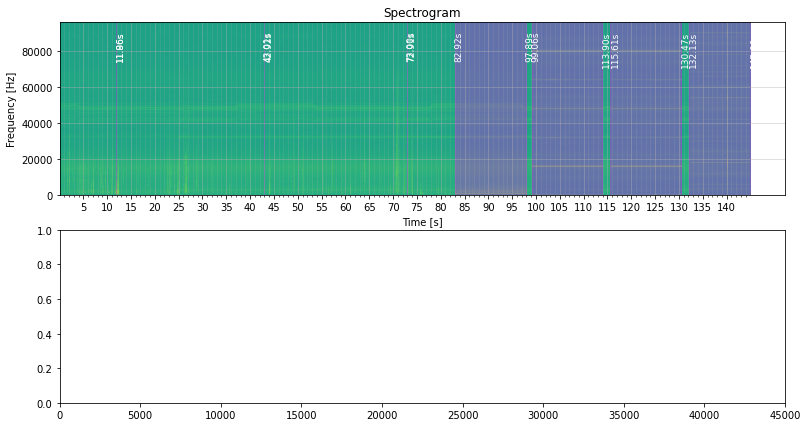

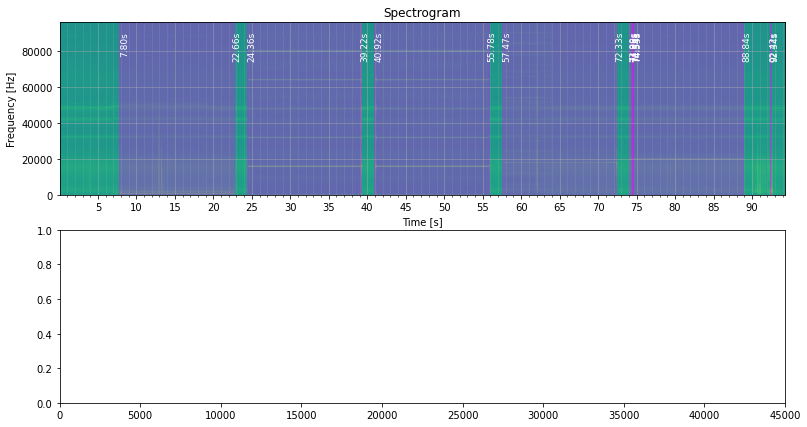

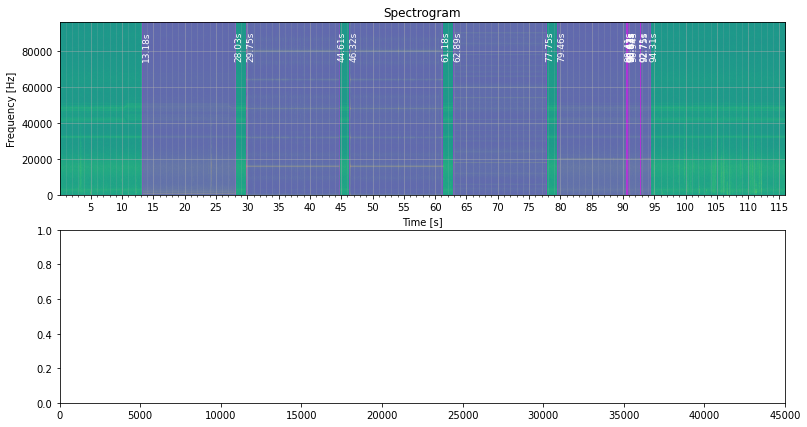

In [72]:
#######test 3 

#test 2
freq_list = []
start_time_list = []
end_time_list = []
input_list = []
for i in range (1,4):

    INPUT_FILE = f"C:/Users/aleja/OneDrive/Desktop/mice maze/recordings_calibration/up_to_40k_maybe_{i}.wav"

    #get times of events, and visually check that everything is okay 
    start_times, end_times, freqs = fv.find_time_range(INPUT_FILE, show_plot = False)
    start_time_list.append(start_times)
    end_time_list.append(end_times)
    freq_list.append(freqs)
    input_list.append(INPUT_FILE)
    
    variables_sorted= sorted(zip(freq_list, input_list, start_time_list, end_time_list))
    

    files_sorted = []
    freq_sorted = []
    start_time_sorted = []
    end_time_sorted = []

    for i in range(len(freq_list)):
        
        freq_sorted.append(variables_sorted[i][0])
        files_sorted.append(variables_sorted[i][1])
        start_time_sorted.append(variables_sorted[i][2])
        end_time_sorted.append(variables_sorted[i][3])

    #spls_for_all= np.array([67.98, 68.95, 67.32, 71.38, 67.77, 66.31, 65.66])

#sorted frequencies        
freq, input_list, start_time, end_time = freq_sorted, files_sorted, start_time_sorted, end_time_sorted 


print("all done!")

In [73]:
print(freq, input_list, start_time, end_time)

[12755.8575, 14203.124, 14203.124] ['C:/Users/aleja/OneDrive/Desktop/mice maze/recordings_calibration/up_to_40k_maybe_1.wav', 'C:/Users/aleja/OneDrive/Desktop/mice maze/recordings_calibration/up_to_40k_maybe_2.wav', 'C:/Users/aleja/OneDrive/Desktop/mice maze/recordings_calibration/up_to_40k_maybe_3.wav'] [[82.92, 99.06, 115.61, 132.13], [7.8, 24.36, 40.92, 57.47, 74.55], [13.18, 29.75, 46.32, 62.89, 79.46]] [[97.89, 113.9, 130.47, 145.0], [22.66, 39.22, 55.78, 72.33, 88.84], [28.03, 44.61, 61.18, 77.75, 90.41]]


In [82]:
####to get the frequencies aligned, I need to multiply the amplitude by the inverse of the frequency response
#Prepare the interpolation function based on uploaded CSV

data = pd.read_csv("C:/Users/aleja/Downloads/frequency_response_speaker.csv")
# Prepare the interpolation function
frequency = data['Frequency_kHz'].values * 1000  # Convert kHz to Hz
attenuation = data['Attenuation_dB'].values
interp_func = interp1d(frequency, attenuation, kind='cubic', fill_value="extrapolate")

# Function to compute gain factor from attenuation (in dB)
def compute_gain(frequency_hz):
    attenuation_db = interp_func(frequency_hz)
    gain = 10 ** (-attenuation_db / 20)
    return gain


In [83]:
# Example: check gain at several frequencies
test_freqs = np.array([8000, 10000, 15000, 20000, 30000, 40000])
test_gains = compute_gain(test_freqs)
attenuation_value = interp_func(test_freqs)
gainz = dict(zip(test_freqs, test_gains))
atts = dict(zip(test_freqs, attenuation_value))

print(gainz)
print(atts)

{8000: 1.0899430028857249, 10000: 0.9897455434993406, 15000: 2.1680776794782015, 20000: 1.3437345740489928, 30000: 1.3000353516125824, 40000: 1.5047361676798678}
{8000: -0.7480757536853302, 10000: 0.08952890114894663, 15000: -6.721496767330472, 20000: -2.5662698325408906, 30000: -2.2791032430832474, 40000: -3.549207195073066}


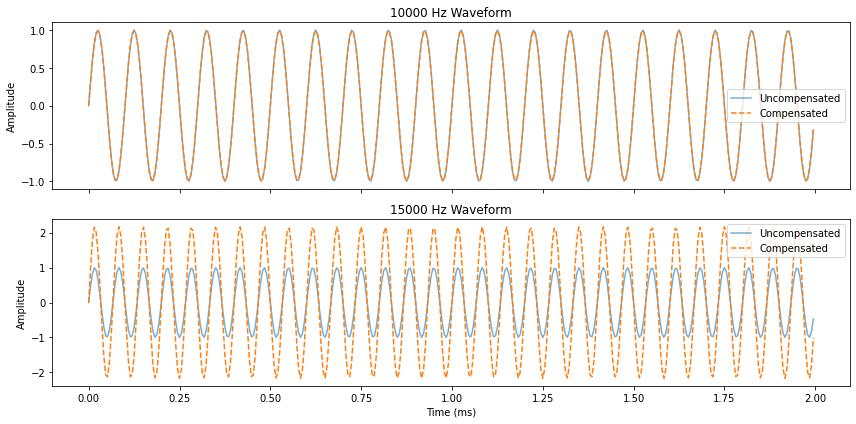

In [84]:
# Generate a sine wave with and without compensation
def generate_wave(frequency, duration=0.002, fs=192000, volume=1.0, compensate=True):
    t = np.linspace(0, duration, int(fs * duration), endpoint=False)
    gain = compute_gain(frequency) if compensate else 1.0
    wave = np.sin(2 * np.pi * frequency * t) * volume * gain
    return t, wave

# Test for two frequencies: one at reference (10kHz), one with high attenuation (15kHz)
frequencies = [10000, 15000]
waves = {}

for f in frequencies:
    t, uncomp = generate_wave(f, compensate=False)
    _, comp = generate_wave(f, compensate=True)
    waves[f] = (t, uncomp, comp)

# Plot the results
fig, axs = plt.subplots(len(frequencies), 1, figsize=(12, 6), sharex=True)

for i, f in enumerate(frequencies):
    t, uncomp, comp = waves[f]
    axs[i].plot(t * 1000, uncomp, label='Uncompensated', alpha=0.6)
    axs[i].plot(t * 1000, comp, label='Compensated', linestyle='--')
    axs[i].set_title(f"{f} Hz Waveform")
    axs[i].set_ylabel("Amplitude")
    axs[i].legend()

axs[-1].set_xlabel("Time (ms)")
plt.tight_layout()
plt.show()